# Previsão de Notas IMDb para Filmes

Este projeto visa prever as notas do IMDb para filmes utilizando um modelo de Machine Learning.

## Estrutura do Projeto

- 'desafio_indicium_imdb.csv': Arquivo CSV contendo os dados dos filmes.
- 'main.py': Script principal para carregar os dados, treinar o modelo e fazer previsões.
- 'requirements.txt': Arquivo com todas as dependências do projeto.

## Requisitos

- Python 3.7 ou superior
- Pip (gerenciador de pacotes do Python)

## Instalação

1. Clone o repositório para sua máquina local:

## bash
git clone https://github.com/LuksPc1/LH_CD_LUCASPAULINO
cd LH_CD_LUCASPAULINO

In [1]:
pip install py-AutoClean

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import pointbiserialr
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
movies = pd.read_csv(r"C:\Users\lxy_l\Downloads\desafio_indicium_imdb.csv")

# Data Collection:

In [6]:
movies

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
995,996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
996,997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
997,998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [7]:
movies.info

<bound method DataFrame.info of      Unnamed: 0                                   Series_Title Released_Year  \
0             1                                  The Godfather          1972   
1             2                                The Dark Knight          2008   
2             3                         The Godfather: Part II          1974   
3             4                                   12 Angry Men          1957   
4             5  The Lord of the Rings: The Return of the King          2003   
..          ...                                            ...           ...   
994         995                         Breakfast at Tiffany's          1961   
995         996                                          Giant          1956   
996         997                          From Here to Eternity          1953   
997         998                                       Lifeboat          1944   
998         999                                   The 39 Steps          1935   

    Cer

# Data Exploration and Cleaning:

In [8]:
movies.nunique()

Unnamed: 0       999
Series_Title     998
Released_Year    100
Certificate       16
Runtime          140
Genre            202
IMDB_Rating       16
Overview         999
Meta_score        63
Director         548
Star1            659
Star2            840
Star3            890
Star4            938
No_of_Votes      998
Gross            822
dtype: int64

In [9]:
movies.shape

(999, 16)

In [10]:
movies.columns

Index(['Unnamed: 0', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime',
       'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1',
       'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [11]:
from AutoClean import AutoClean

pipeline = AutoClean(movies)
pipeline.output.head()

AutoClean process completed in 0.570845 seconds
Logfile saved to: C:\Users\lxy_l\Downloads\autoclean.log


,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Certificate_lab
0,1,The Godfather,1972,A,175 min,"Crime, Drama",8.7,An organized crime dynasty's aging patriarch t...,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,849711,"134,966,411",1
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",8.7,When the menace known as the Joker wreaks havo...,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,849711,"534,858,444",14
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",8.7,The early life and career of Vito Corleone in ...,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,849711,"57,300,000",1
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",8.7,A jury holdout attempts to prevent a miscarria...,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",12
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.7,Gandalf and Aragorn lead the World of Men agai...,94,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,849711,"377,845,905",12


In [12]:
movies.columns

Index(['Unnamed: 0', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime',
       'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1',
       'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

## The data have some problems with missing and duplicate values

In [13]:
movies.isnull().sum()*100/movies.shape[0]

Unnamed: 0        0.000000
Series_Title      0.000000
Released_Year     0.000000
Certificate      10.110110
Runtime           0.000000
Genre             0.000000
IMDB_Rating       0.000000
Overview          0.000000
Meta_score       15.715716
Director          0.000000
Star1             0.000000
Star2             0.000000
Star3             0.000000
Star4             0.000000
No_of_Votes       0.000000
Gross            16.916917
dtype: float64

## Removing the duplicates and unnecessary data

In [14]:
movies.duplicated().sum()
movies.drop_duplicates(inplace=True)

In [15]:
movies.isnull().sum()

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

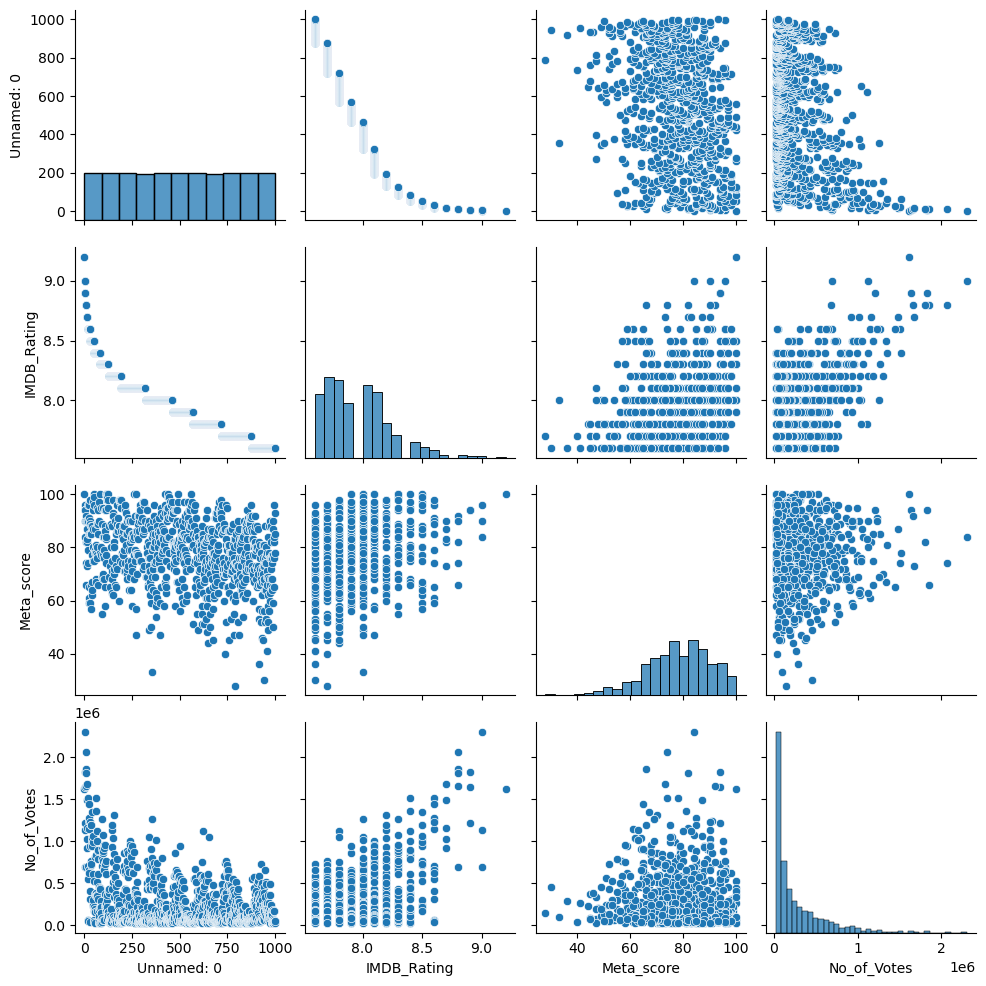

In [16]:
sns.pairplot(movies)
plt.show()

In [17]:
movies.drop(['Unnamed: 0','Certificate'], axis=1, inplace=True)

In [18]:
movies['Gross'] = movies['Gross'].str.replace(',', '').astype(float)

In [19]:
movies['Runtime'] = movies['Runtime'].str.replace(' min', '').astype(int)

# Missing Data Handling
- Dealing with missing values, replacing the 'NaN' values with 0

In [20]:
movies.fillna('0')

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,The Godfather: Part II,1974,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,12 Angry Men,1957,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,The Lord of the Rings: The Return of the King,2003,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Breakfast at Tiffany's,1961,115,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,0
995,Giant,1956,201,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,0
996,From Here to Eternity,1953,118,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
997,Lifeboat,1944,97,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,0


In [21]:
movies.describe()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.000000,999.000000,842.000000,9.990000e+02,8.300000e+02
mean,122.871872,7.947948,77.969121,2.716214e+05,6.808257e+07
std,28.101227,0.272290,12.383257,3.209126e+05,1.098076e+08
min,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,103.000000,7.700000,70.000000,5.547150e+04,3.245338e+06
50%,119.000000,7.900000,79.000000,1.383560e+05,2.345744e+07
75%,137.000000,8.100000,87.000000,3.731675e+05,8.087634e+07
max,321.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


In [22]:
movies.head(10)
movies.fillna('0')

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,The Godfather: Part II,1974,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,12 Angry Men,1957,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,The Lord of the Rings: The Return of the King,2003,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Breakfast at Tiffany's,1961,115,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,0
995,Giant,1956,201,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,0
996,From Here to Eternity,1953,118,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
997,Lifeboat,1944,97,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,0


In [23]:
Q1 = movies['IMDB_Rating'].quantile(0.25)
Q3 = movies['IMDB_Rating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = movies[(movies['IMDB_Rating'] < lower_bound) | (movies['IMDB_Rating'] > upper_bound)]

print(outliers.head())

                                    Series_Title Released_Year  Runtime  \
0                                  The Godfather          1972      175   
1                                The Dark Knight          2008      152   
2                         The Godfather: Part II          1974      202   
3                                   12 Angry Men          1957       96   
4  The Lord of the Rings: The Return of the King          2003      201   

                      Genre  IMDB_Rating  \
0              Crime, Drama          9.2   
1      Action, Crime, Drama          9.0   
2              Crime, Drama          9.0   
3              Crime, Drama          9.0   
4  Action, Adventure, Drama          8.9   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging patriarch t...       100.0   
1  When the menace known as the Joker wreaks havo...        84.0   
2  The early life and career of Vito Corleone in ...        90.0   
3  A jury ho

## Data Correlation

In [24]:
correlation_matrix = movies.corr()

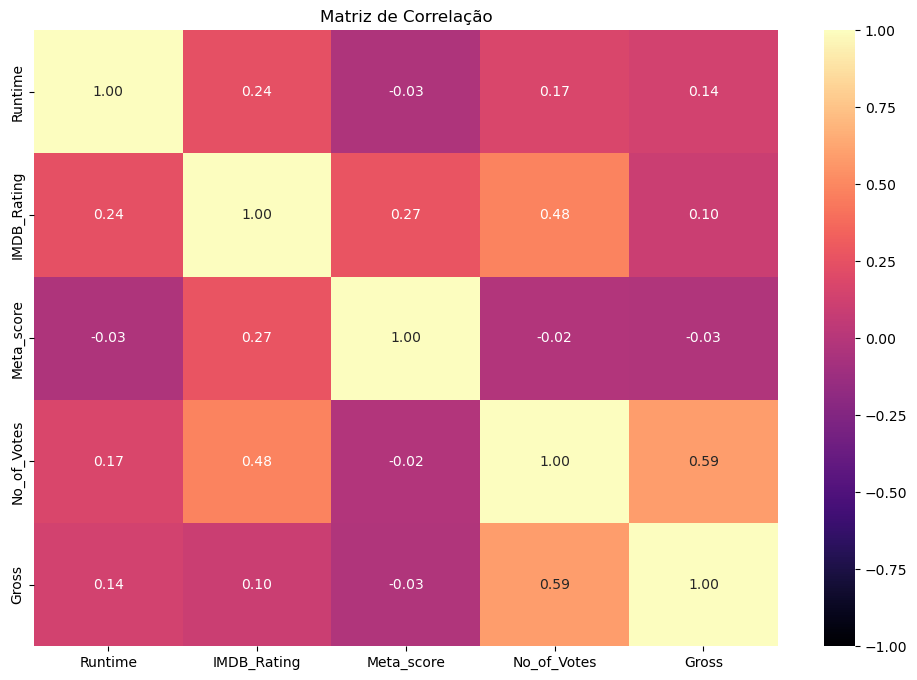

In [59]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

In [26]:
movies['Genre'].unique()

array(['Crime, Drama', 'Action, Crime, Drama', 'Action, Adventure, Drama',
       'Biography, Drama, History', 'Action, Adventure, Sci-Fi', 'Drama',
       'Drama, Romance', 'Western', 'Action, Sci-Fi',
       'Biography, Crime, Drama', 'Action, Adventure, Fantasy',
       'Comedy, Drama, Thriller', 'Adventure, Drama, Sci-Fi',
       'Animation, Adventure, Family', 'Drama, War',
       'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller',
       'Action, Drama, Mystery', 'Drama, Family, Fantasy', 'Drama, Music',
       'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
       'Biography, Drama, Music', 'Crime, Mystery, Thriller',
       'Animation, Adventure, Drama', 'Animation, Drama, War',
       'Adventure, Comedy, Sci-Fi', 'Horror, Mystery, Thriller',
       'Drama, Romance, War', 'Comedy, Drama, Family',
       'Animation, Drama, Fantasy', 'Action, Biography, Drama',
       'Animation, Action, Adventure', 'Drama, Western',


<Axes: xlabel='No_of_Votes', ylabel='IMDB_Rating'>

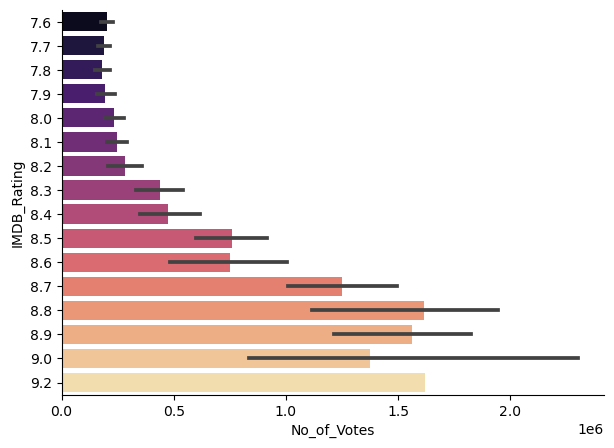

In [27]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.barplot(x='No_of_Votes', y='IMDB_Rating', data=movies, palette='magma', orient='h')

<Axes: xlabel='Gross', ylabel='Meta_score'>

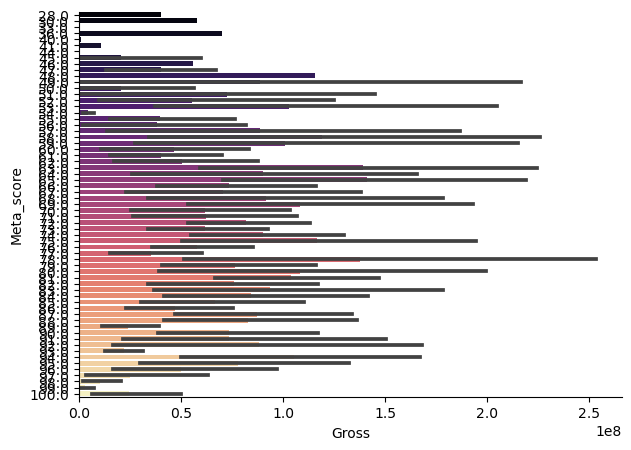

In [60]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.barplot(x='Gross', y='Meta_score', data=movies, palette='magma', orient='h')

<Axes: xlabel='IMDB_Rating', ylabel='Gross'>

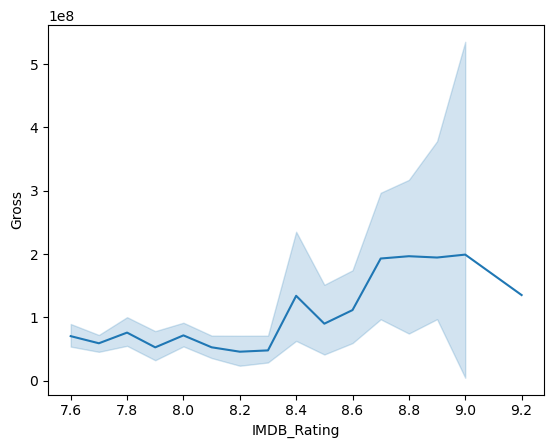

In [61]:
sns.lineplot(x='IMDB_Rating', y='Gross', data=movies, palette='magma')

<Axes: xlabel='Runtime', ylabel='IMDB_Rating'>

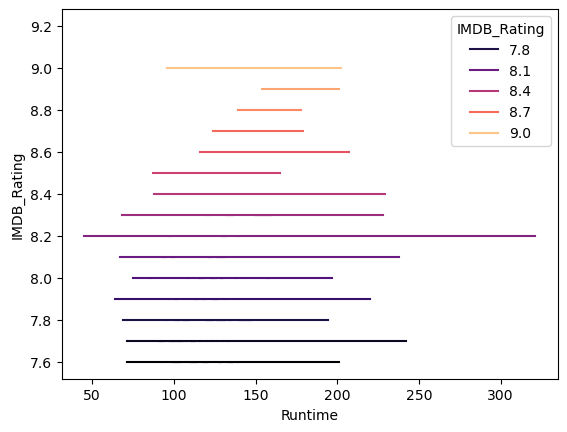

In [32]:
sns.lineplot(x='Runtime', y='IMDB_Rating', data=movies, hue='IMDB_Rating', palette='magma')

<Axes: xlabel='IMDB_Rating', ylabel='Genre'>

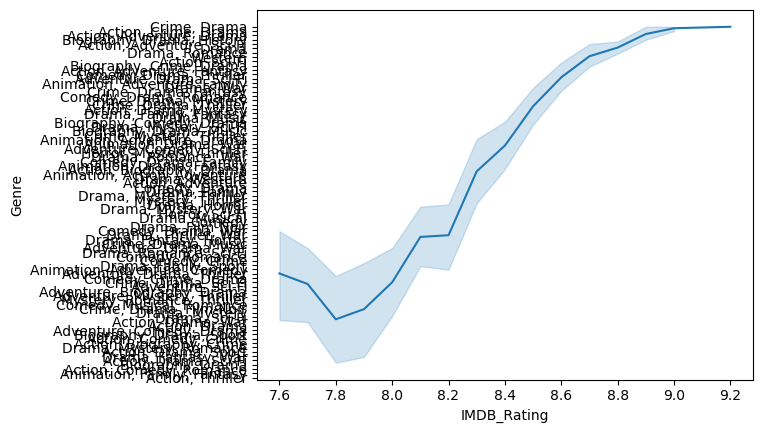

In [31]:
sns.lineplot(x='IMDB_Rating', y='Genre', data=movies, palette='magma')

Text(0.5, 1.0, 'Density of Votes')

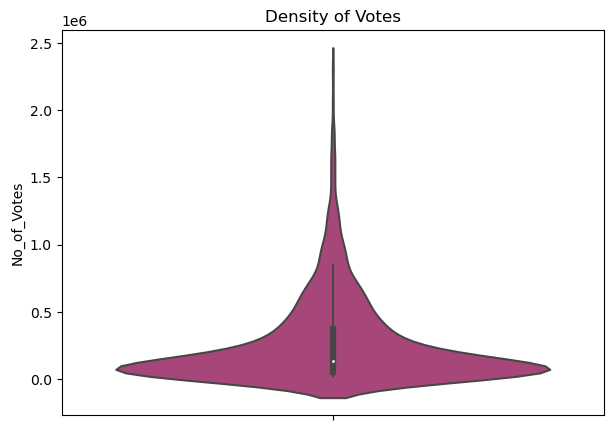

In [37]:
f, ax = plt.subplots(figsize=(7, 5))
sns.violinplot(y='No_of_Votes', data = pd.read_csv(r"C:\Users\lxy_l\Downloads\desafio_indicium_imdb.csv"), palette='magma')
plt.title('Density of Votes')

Text(0.5, 1.0, '')

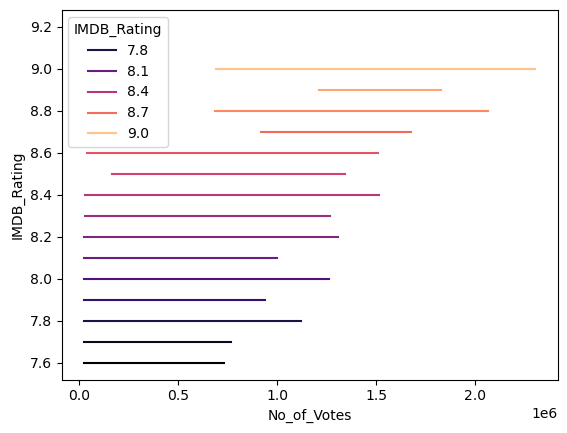

In [29]:
sns.lineplot(x='No_of_Votes', y='IMDB_Rating', data=movies, hue='IMDB_Rating', palette='magma')
plt.title('')

<Axes: xlabel='IMDB_Rating', ylabel='No_of_Votes'>

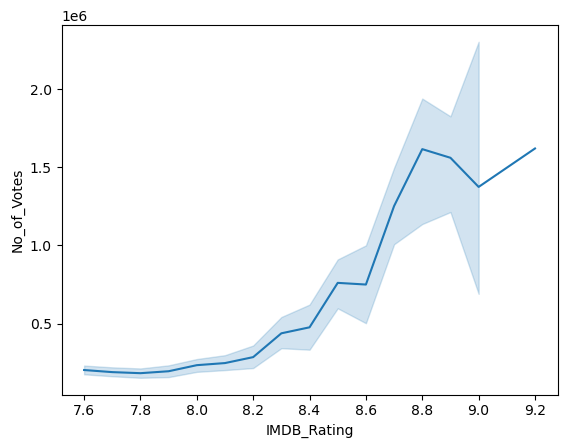

In [34]:
sns.lineplot(x='IMDB_Rating', y='No_of_Votes', data=movies, palette='magma')

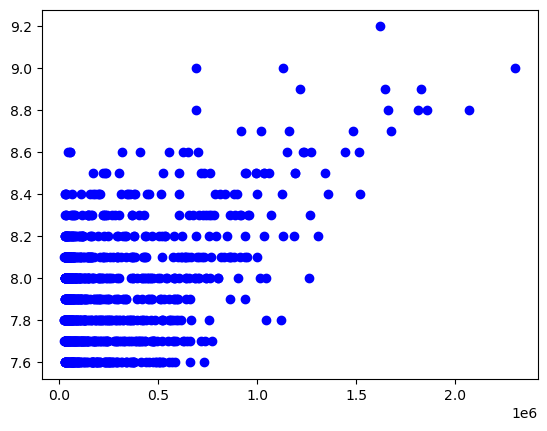

In [36]:
plt.plot(movies['No_of_Votes'], movies['IMDB_Rating'], linestyle='none', marker='o', color='b')
plt.show()

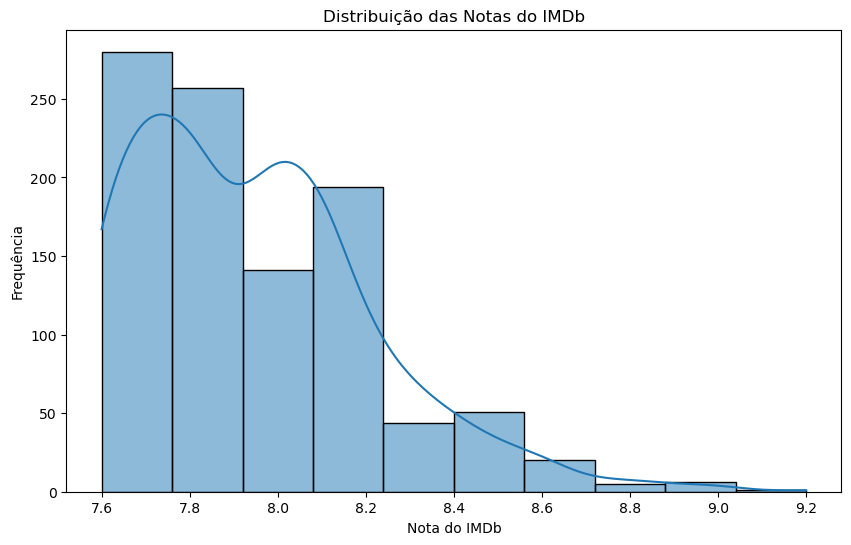

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(movies['IMDB_Rating'], bins=10, kde=True)
plt.title('Distribuição das Notas do IMDb')
plt.xlabel('Nota do IMDb')
plt.ylabel('Frequência')
plt.show()

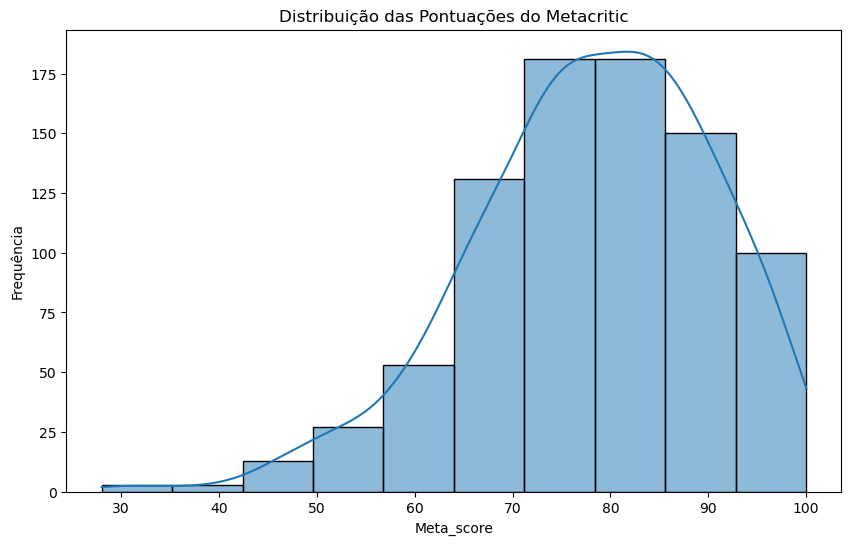

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(movies['Meta_score'].dropna(), bins=10, kde=True)
plt.title('Distribuição das Pontuações do Metacritic')
plt.xlabel('Meta_score')
plt.ylabel('Frequência')
plt.show()

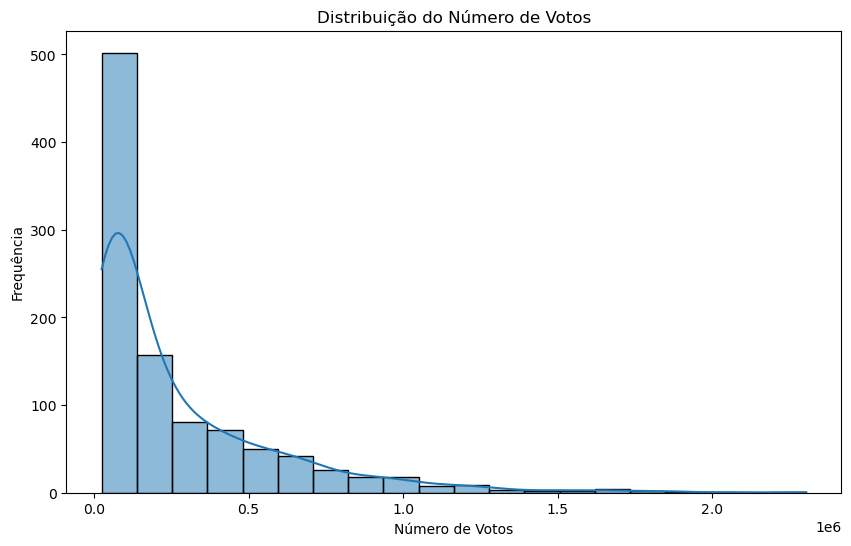

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(movies['No_of_Votes'], bins=20, kde=True)
plt.title('Distribuição do Número de Votos')
plt.xlabel('Número de Votos')
plt.ylabel('Frequência')
plt.show()

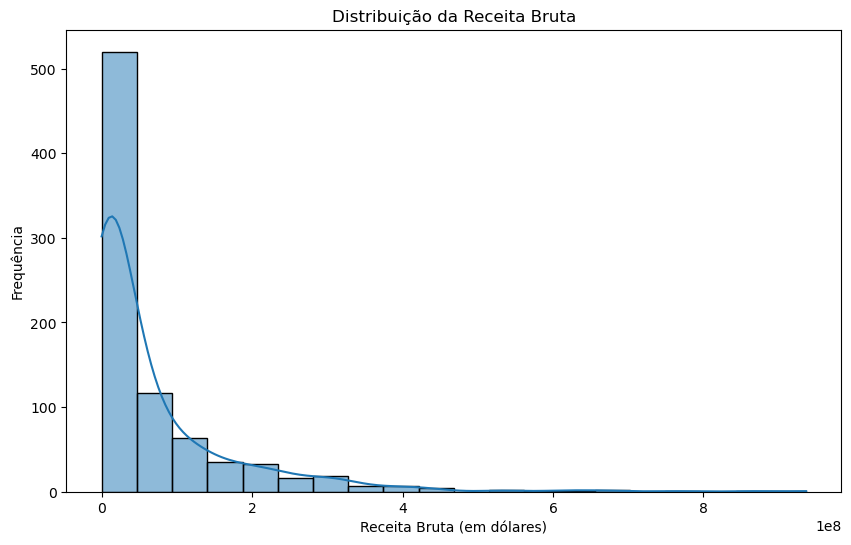

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(movies['Gross'].astype(float), bins=20, kde=True)
plt.title('Distribuição da Receita Bruta')
plt.xlabel('Receita Bruta (em dólares)')
plt.ylabel('Frequência')
plt.show()

# Data Preparation:

## Identifying relevant features that may contribute to the RandomForestRegressor.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [44]:
if 'Unnamed: 0' in movies.columns:
    movies = movies.drop(columns=['Unnamed: 0'])

In [45]:
print("Colunas disponíveis no DataFrame:", movies.columns)

Colunas disponíveis no DataFrame: Index(['Series_Title', 'Released_Year', 'Runtime', 'Genre', 'IMDB_Rating',
       'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3',
       'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')


In [46]:
num_features = ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross']
cat_features = ['Certificate', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']

In [47]:
num_features = [col for col in num_features if col in movies.columns]
cat_features = [col for col in cat_features if col in movies.columns]
print("Colunas numéricas selecionadas:", num_features)
print("Colunas categóricas selecionadas:", cat_features)

Colunas numéricas selecionadas: ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross']
Colunas categóricas selecionadas: ['Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']


In [48]:
for col in num_features:
    movies[col] = pd.to_numeric(movies[col], errors='coerce')

# Model Training: 

- Training and Testing the data sets

In [49]:
X = movies.drop(columns=['IMDB_Rating'])
y = movies['IMDB_Rating']

In [50]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

In [51]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [52]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

In [53]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Released_Year', 'Runtime',
                                                   'Meta_score', 'No_of_Votes',
                                                   'Gross']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Genre', 'Director', 'Star1',
                                                   'Star2', 'Star3',
                                                   'Star4'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [56]:
y_pred = model.predict(X_test)

In [57]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.15420499999999984


# Testing the IMDb rating

In [58]:
new_movie = pd.DataFrame([{
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': 1994,
    'Certificate': 'A',
    'Runtime': 142,
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': 28341469
}])

new_movie = new_movie[num_features + cat_features]

new_movie_pred = model.predict(new_movie)
print(f'Predicted IMDB Rating: {new_movie_pred[0]}')

Predicted IMDB Rating: 8.768999999999993
